## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "C:\\Users\\weima\\OneDrive\\Desktop\\UWA Bootcamp\\Python\\Module_5\\Mouse_metadata.csv"
study_results_path = "C:\\Users\\weima\\OneDrive\\Desktop\\UWA Bootcamp\\Python\\Module_5\\Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
complete_data_1 = pd.merge(mouse_metadata, study_results, on = ["Mouse ID"])

# Display the data table for preview
complete_data_1

FileNotFoundError: [Errno 2] File C:\Users\weima\OneDrive\Desktop\UWA Bootcamp\Python\Module_5\Mouse_metadata.csv does not exist: 'C:\\Users\\weima\\OneDrive\\Desktop\\UWA Bootcamp\\Python\\Module_5\\Mouse_metadata.csv'

In [ ]:
# Checking the number of mice.
number_of_mice = complete_data_1['Mouse ID'].value_counts()
number_of_mice = len(number_of_mice)
number_of_mice = pd.DataFrame({"Total Number of Mice": [number_of_mice]})
number_of_mice

,Total Number of Mice
0,249


In [ ]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mouse_df = pd.DataFrame(complete_data_1, columns =["Mouse ID", "Timepoint"])
duplicates = mouse_df[mouse_df.duplicated()]
duplicates

,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [ ]:
# Get all the data for the duplicate mouse ID. 
duplicate_mouse = complete_data_1.loc[complete_data_1["Mouse ID"] == 'g989']
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [ ]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID. (!= as short hand notation to delete)
complete_data = complete_data_1.loc[complete_data_1['Mouse ID'] != 'g989',:]
complete_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [ ]:
# Checking the number of mice in the clean DataFrame.
number_of_mice = complete_data['Mouse ID'].value_counts()
number_of_mice = len(number_of_mice)
number_of_mice = pd.DataFrame({"Total Number of Mice": [number_of_mice]})
number_of_mice

,Total Number of Mice
0,248


## Summary Statistics

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
regimen = complete_data.groupby('Drug Regimen')
# mean, median, variance, standard deviation, and SEM of the tumour volume. 
regimen_mean = regimen.mean()["Tumour Volume (mm3)"]
regimen_median = regimen.median()["Tumour Volume (mm3)"]
regimen_variance = regimen.var()["Tumour Volume (mm3)"]
regimen_std = regimen.std()["Tumour Volume (mm3)"]
regimen_sem = regimen.sem()["Tumour Volume (mm3)"]
# Assemble the resulting series into a single summary dataframe.

regimen_summary = pd.DataFrame({"Mean Tumour Volume": regimen_mean, 
                                "Median Tumour Volume": regimen_median,
                                "Variance Tumour Volume": regimen_variance,
                                "Standard Deviation Tumour Volume": regimen_std,
                                "SEM Tumour Volume": regimen_sem})
regimen_summary

,Mean Tumour Volume,Median Tumour Volume,Variance Tumour Volume,Standard Deviation Tumour Volume,SEM Tumour Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line(provides a simplified method of grabbing results to the previous question)
regimen_aggregate = regimen["Tumour Volume (mm3)"].aggregate(['mean', 'median', 'var', 'std', 'sem'])
regimen_aggregate

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Total Timepoints')

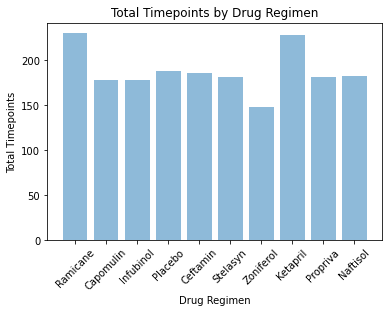

In [ ]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
    # Display the timpoint of the "Drug Regimen"
mouse_timepoint = complete_data.loc[:,["Timepoint", "Drug Regimen"]]
timepoint_test = mouse_timepoint.groupby('Drug Regimen')
# Generate variable for x-axis (tick)                       
timepoint= timepoint_test["Timepoint"].count()
drug_regimen = mouse_timepoint["Drug Regimen"].unique()
    
x_axis= np.arange(len(timepoint))
 # Plot the data as a histogram
plt.bar(x_axis, timepoint, alpha=0.5, align="center");
tick_location = [value for value in x_axis]
plt.xticks(tick_location, drug_regimen, rotation=45)
    # Provide necessary axis details
plt.title("Total Timepoints by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Timepoints")




Text(0, 0.5, 'Total Timepoints')

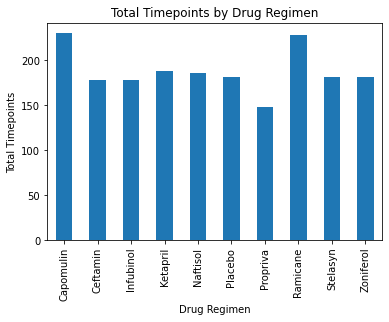

In [ ]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
regimen_timepoint = timepoint.plot(kind="bar", title="Total Timepoints by Drug Regimen")
regimen_timepoint.set_xlabel("Drug Regimen")
regimen_timepoint.set_ylabel("Total Timepoints")

Text(0.5, 1.0, 'Mouse Distribution by Gender')

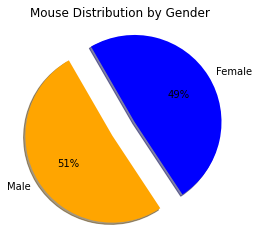

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = complete_data.loc[:,["Sex"]]
labels = ["Male", "Female"]
gender = gender["Sex"].value_counts()
colors= ['orange', 'blue']
explode = [0.1,0.2]

gender_count = plt.pie(gender, explode=explode, labels=labels, colors=colors, 
                       autopct="%1.0f%%", shadow=True, startangle=120)
plt.title("Mouse Distribution by Gender")

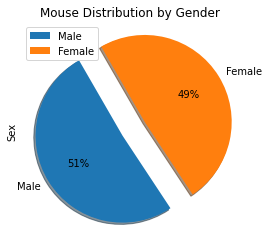

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_plot = gender.plot(kind="pie", title="Mouse Distribution by Gender", explode=explode, startangle=120, autopct="%1.0f%%", shadow=True)
gender_plot.legend(['Male', "Female"], loc = 'best')

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge the data to retrieve the last timepoint of each mouspoint (GroupBy)
group_by_mouse_ID = complete_data.groupby("Mouse ID")
max_timepoint = group_by_mouse_ID['Timepoint'].max()
    # Reset the dataframe index
max_timepoint = max_timepoint.reset_index()

# Merge this group df with the original dataframe to get the tumour volume at the last timepoint
max_timepoint_volume = max_timepoint.merge(complete_data, on=["Mouse ID", "Timepoint"], how="left")
max_timepoint_volume


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumour Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [ ]:
# Place four treatment groups into a list
drug_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create an empty list to be filled with tumour data
tumour_volume = []

# Identify the greatest tumour volume for the tumour volume
for drug in drug_regimens:
    tumour_by_drug = max_timepoint_volume.loc[max_timepoint_volume["Drug Regimen"] == drug, "Tumour Volume (mm3)"]
    tumour_volume.append(tumour_by_drug)  

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = max_timepoint_volume["Tumour Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    # Include lower and upper bounds of the interquartile range (increase and decreae of 15% = * 1.5)

lowerbound = lowerq - (1.5*iqr)
upperbound = upperq + (1.5*iqr)

    

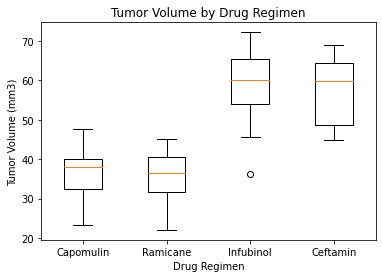

In [ ]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
figure, axis_1 = plt.subplots()
x = [1,2,3,4]
axis_1.set_title('Tumor Volume by Drug Regimen')
axis_1.set_ylabel('Tumor Volume (mm3)')
axis_1.set_xlabel('Drug Regimen')
axis_1.boxplot(tumoUr_volume)
plt.xticks(x, drug_regimens)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumour Volume (mm3)')

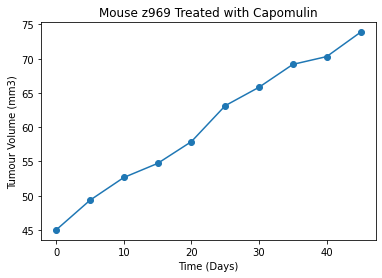

In [ ]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin
mouse_z969 = complete_data.loc[complete_data['Mouse ID'] == 'z969']
plt.plot(mouse_z969['Timepoint'], mouse_z969['Tumour Volume (mm3)'], marker = 'o')
plt.title('Mouse z969 Treated with Capomulin')
plt.xlabel('Time (Days)')
plt.ylabel('Tumour Volume (mm3)')

Text(0, 0.5, 'Mouse Weight (grams)')

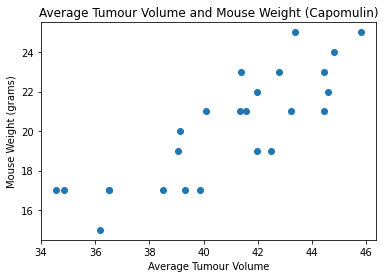

In [ ]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen
capomulin_regimen = complete_data.loc[complete_data['Drug Regimen'] == 'Capomulin']
tumour_volume = capomulin_regimen.groupby(['Mouse ID']).mean()

average_tumour_volume = tumour_volume['Tumour Volume (mm3)']
average_weight = tumour_volume['Weight (g)']

plt.scatter(average_tumour_volume, average_weight)
plt.title('Average Tumour Volume and Mouse Weight (Capomulin)')
plt.xlabel('Average Tumour Volume')
plt.ylabel('Mouse Weight (grams)')

## Correlation and Regression

The correlation coefficient between mouse weight and the average tumour volume is: 0.84


TypeError: 'str' object is not callable

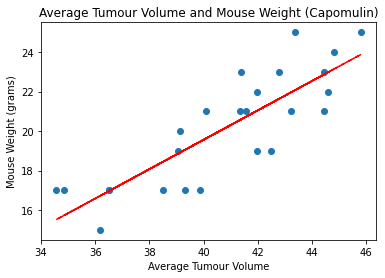

In [ ]:
# Calculate the correlation coefficient and linear regression model
# for mouse weight and average tumour volume for the Capomulin regimen
    # Correlation Coefficient
correlation = st.pearsonr(average_tumour_volume, average_weight)
print(f'The correlation coefficient between mouse weight and the average tumour volume is: {round(correlation[0],2)}')
    # Linear Regression Model
(slope, intercept, rvalue, pvalue, std_err) = st.linregress(average_tumour_volume, average_weight)
fit = slope * average_tumour_volume + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(average_tumour_volume, average_weight)
plt.plot(average_tumour_volume, fit,"--", color = 'red')
plt.title('Average Tumour Volume and Mouse Weight (Capomulin)')
plt.xlabel('Average Tumour Volume')
plt.ylabel('Mouse Weight (grams)')
plt.annotate(line_eq(42, 16),fontsize=15,color="red")
